# Object Detection using text-prompt deployed by Nandini Lokesh Reddy

In [61]:
!pip install ultralytics torch --quiet

### Load the image

In [2]:
# To display the image
from PIL import Image

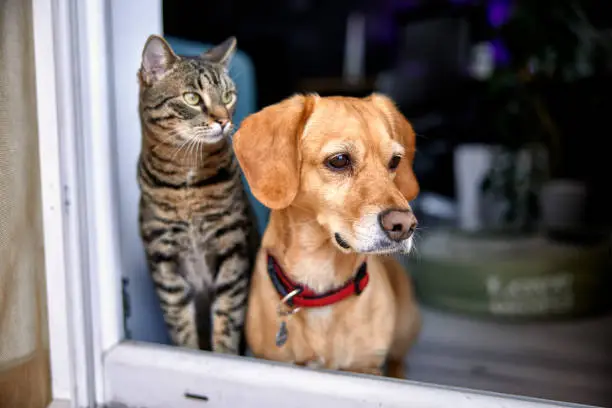

In [35]:
# Display the images
raw_image = Image.open("catdog.jpg")
raw_image

### Get bounding boxes with OWL-ViT object detection model

In [4]:
from transformers import pipeline

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [252]:
pip install transformers --quiet


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


you can download the OWL-ViT model here: https://huggingface.co/google/owlvit-base-patch32/tree/main

In [24]:
OWL_checkpoint = "OWL-Vit-base-patch32"

In [25]:
# Load the model
detector = pipeline(
    model= OWL_checkpoint,
    task="zero-shot-object-detection"
)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


Info about ['google/owlvit-base-patch32'](https://huggingface.co/google/owlvit-base-patch32)

* Build the pipeline for the detector model.

In [42]:
# What you want to identify in the image
text_prompt = "dog"

In [43]:
output = detector(
    raw_image,
    candidate_labels = [text_prompt]
)

In [44]:
# Print the output to identify the bounding boxes detected
output

[{'score': 0.17663416266441345,
  'label': 'dog',
  'box': {'xmin': 230, 'ymin': 85, 'xmax': 429, 'ymax': 378}}]

In [251]:
pip install scikit-image --quiet


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
from utils import preprocess_outputs

In [45]:
input_scores, input_labels, input_boxes = preprocess_outputs(output)

In [46]:
from utils import show_boxes_and_labels_on_image

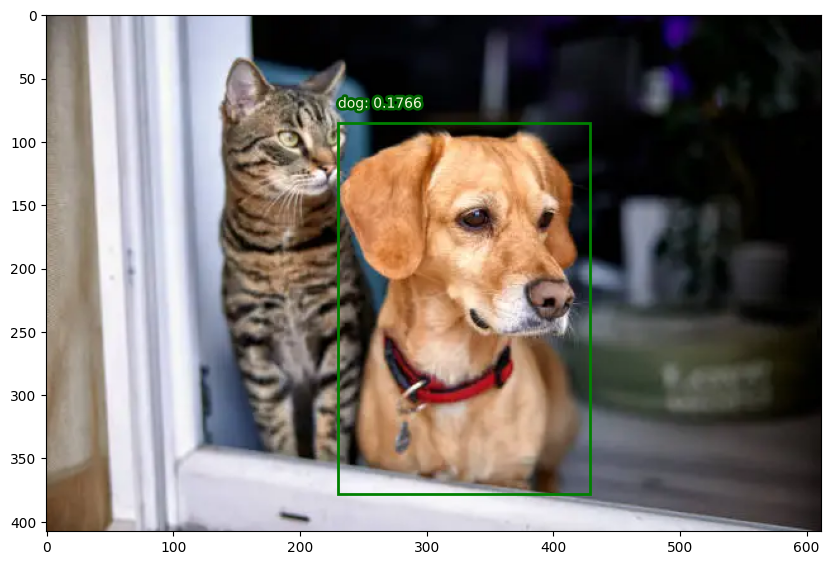

In [47]:
# Show the image with the bounding boxes
show_boxes_and_labels_on_image(
    raw_image,
    input_boxes[0],
    input_labels,
    input_scores
)

### Get segmentation masks using Mobile SAM

you can download MobileSAM here: https://docs.ultralytics.com/models/mobile-sam/ 


In [48]:
# Load the SAM model from the imported ultralytics library
from ultralytics import SAM

In [49]:
SAM_version = "mobile_sam.pt"

Info about [mobile_sam.pt](https://docs.ultralytics.com/models/mobile-sam/)

In [50]:
model = SAM(SAM_version)

* Generate an array using numpy.

In [51]:
import numpy as np

In [52]:
labels = np.repeat(1, len(output))

In [53]:
# Print the number of bounding boxes
labels

array([1])

In [54]:
result = model.predict(
    raw_image,
    bboxes=input_boxes[0],
    labels=labels
)


0: 1024x1024 807.7ms
Speed: 12.2ms preprocess, 807.7ms inference, 3.6ms postprocess per image at shape (1, 3, 1024, 1024)


In [55]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '0'}
 obb: None
 orig_img: array([[[79, 84, 90],
         [79, 84, 90],
         [79, 84, 90],
         ...,
         [ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1]],
 
        [[79, 84, 90],
         [79, 84, 90],
         [79, 84, 90],
         ...,
         [ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1]],
 
        [[80, 85, 91],
         [80, 85, 91],
         [80, 85, 91],
         ...,
         [ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1]],
 
        ...,
 
        [[21, 45, 75],
         [23, 47, 78],
         [27, 51, 81],
         ...,
         [29, 26, 36],
         [26, 22, 32],
         [23, 20, 30]],
 
        [[21, 45, 75],
         [23, 47, 78],
         [27, 51, 81],
         ...,
         [29, 27, 34],
         [26, 23, 30],
         [23, 21, 28]],
 
        [[21, 45, 75],
         

In [56]:
masks = result[0].masks.data
masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])

In [57]:
from utils import show_masks_on_image

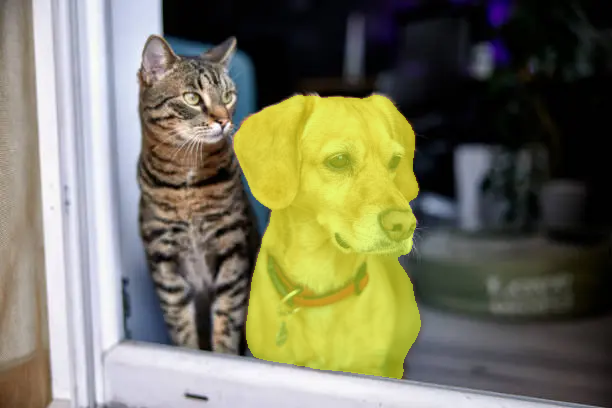

In [58]:
# Visualize the masks
show_masks_on_image(
    raw_image,
    masks
)

### Image Editing: blur out faces

* Load the image.

In [61]:
from PIL import Image

In [226]:
image_path = "people.jpeg"

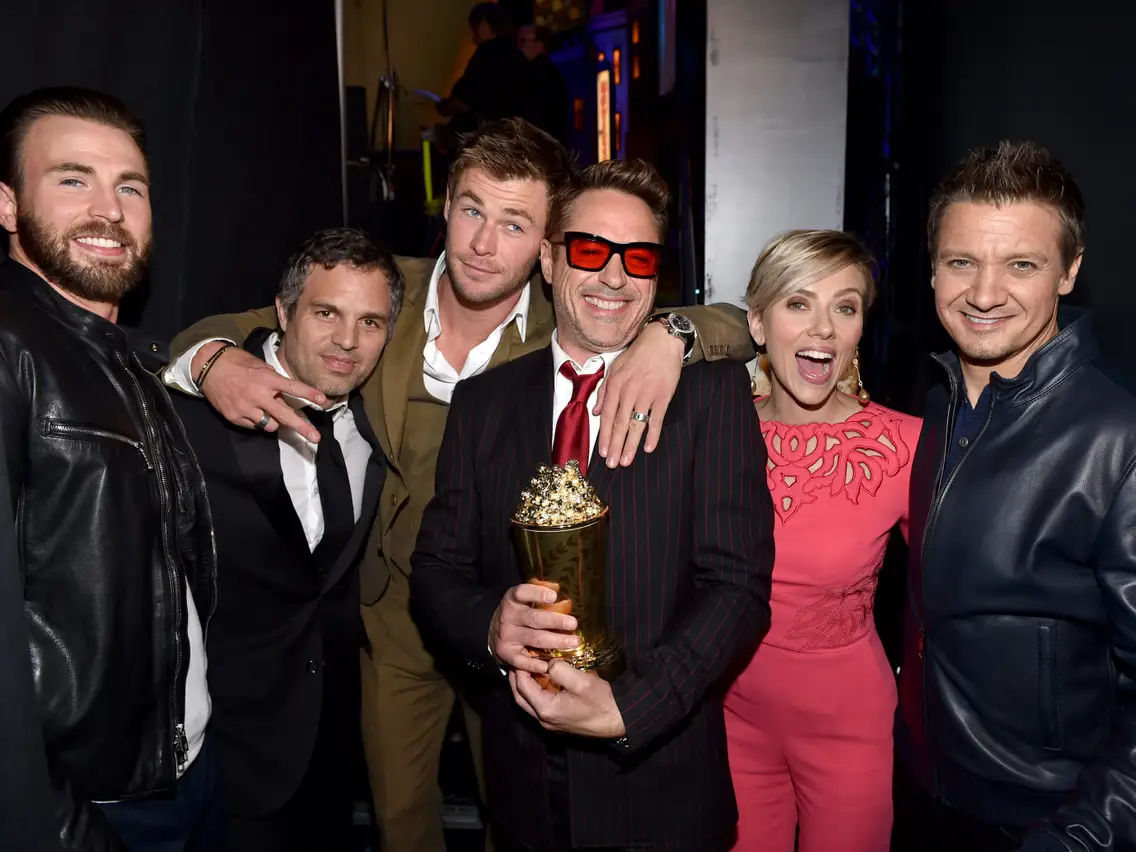

In [227]:
raw_image = Image.open(image_path)
raw_image

In [228]:
raw_image.size

(1136, 852)

* Resize the image.

In [229]:
# Width transformation
mywidth = 600
wpercent = mywidth / float(raw_image.size[0])
wpercent

0.528169014084507

In [230]:
# Height transformation
hsize = int( float(raw_image.size[1]) * wpercent )
hsize

449

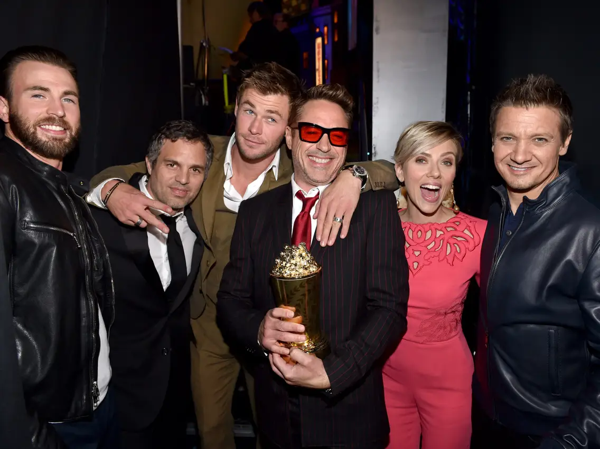

In [231]:
# Resize
raw_image = raw_image.resize([mywidth, hsize])
raw_image

In [232]:
raw_image.size

(600, 449)

In [233]:
# Save the resized image
image_path_resized = "avengers_resized.jpg"
raw_image.save(image_path_resized)

### Detect faces

In [234]:
candidate_labels = ["human face"]

* Create bounding boxes with OWL-ViT.

In [235]:
# Apply detector model to the raw image
output = detector(
    raw_image,
    candidate_labels=candidate_labels
)

In [236]:
input_scores, input_labels, input_boxes = preprocess_outputs(output)

In [237]:
# Print values of the bounding boxes identified
input_boxes

[[[8, 61, 80, 156],
  [401, 137, 457, 211],
  [152, 139, 208, 207],
  [233, 89, 290, 159],
  [491, 105, 562, 189],
  [291, 100, 351, 182],
  [272, 12, 285, 29],
  [247, 7, 260, 23]]]

In [253]:
from utils import make_bbox_annots

### Segmentation masks using SAM

In [254]:
result = model.predict(
    image_path_resized,
    bboxes=input_boxes[0],
    labels=np.repeat(1, len(input_boxes[0]))
)


image 1/1 /Users/nandinilreddy/Desktop/OWL-ViT/avengers_resized.jpg: 1024x1024 1128.5ms
Speed: 26.0ms preprocess, 1128.5ms inference, 6.1ms postprocess per image at shape (1, 3, 1024, 1024)


### Blur entire image first

In [242]:
from PIL.ImageFilter import GaussianBlur

In [243]:
blurred_img = raw_image.filter(GaussianBlur(radius=5))

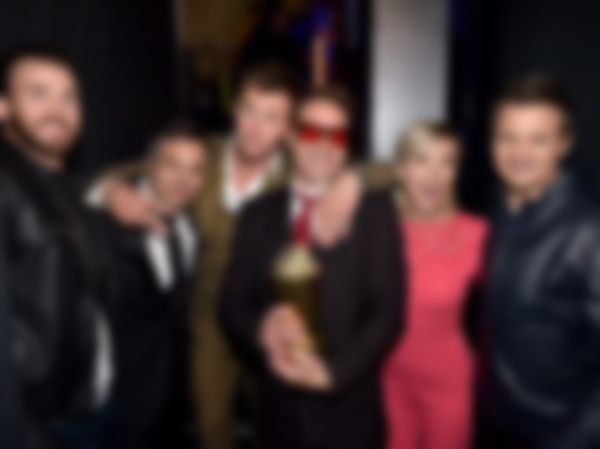

In [244]:
blurred_img 

In [245]:
masks = result[0].masks.data.cpu().numpy()

In [246]:
# Obtain only a single mask
total_mask = np.zeros(masks[0].shape)

In [247]:
for mask in masks:
    total_mask = np.add(total_mask,mask)

In [248]:
output = np.where(
    np.expand_dims(total_mask != 0, axis=2),
    blurred_img,
    raw_image
)

In [249]:
import matplotlib.pyplot as plt

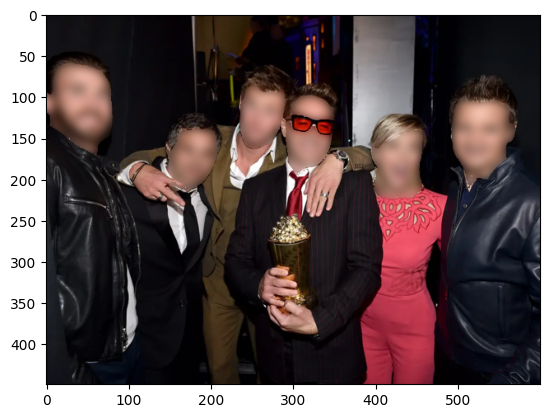

In [250]:
# Print image with faces blured
plt.imshow(output)